# Fase 2c: Processamentos

    Paulo Eduardo Rodrigues Jr.

Objetivo: Testar o desempenho da segmentaçao e determinar a direção da rua mediante outra abordagem:
        
        - Segmentar a região inferior da rua
        - Determinar o centróide da região de interesse
        - Determinar a direção da rua

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def showfig(image):
    plt.figure(figsize=(6,6))
    plt.imshow(image, 'gray')

#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [7, 7], 
          'axes.titlesize':16, 
          'font.size': 16,
          'legend.fontsize': 12, 
          'xtick.labelsize': 12, 
          'ytick.labelsize': 8
         }
plt.rcParams.update(params)

In [3]:
def region_of_interest(img):
    height = img.shape[0]
    width = img.shape[1]
    mask = np.ones_like(img)*255

    poly = np.array([[  # Polígono para fazer a máscara (feito sob medida da)
    (0,0),
    (width,0),
    (width,210),
    (0,210),]], np.int32)
    masked=cv2.fillPoly(mask, poly,0) #return none --> preenche a região
    masked_image = cv2.bitwise_and(img, mask) #Ou exclusivo para ignorar oq estiver fora da mask
    return masked_image

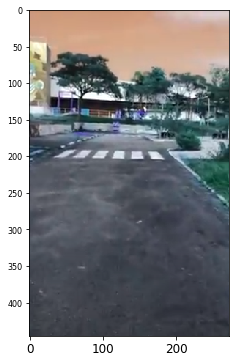

In [4]:
pista =cv2.imread('pista.png')
showfig(pista)

122.0


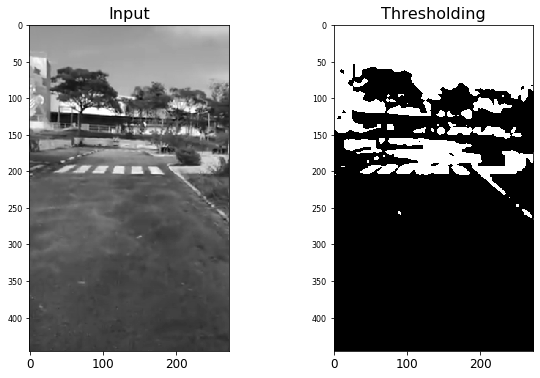

In [5]:
#Testar o modo easy: Threshold Otsu
gray = cv2.cvtColor(pista,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(7,7),0 )
#gray = gray[10:210,10:210]
T,c = cv2.threshold(blur,90,120,cv2.THRESH_OTSU) 
print(T)
plt.figure(figsize=(10,6)) 
plt.subplot(121),plt.imshow(gray,"gray"),plt.title('Input')
plt.subplot(122),plt.imshow(c,"gray"),plt.title('Thresholding')
plt.savefig("Imagens\Dando_erro.pdf")

plt.show()

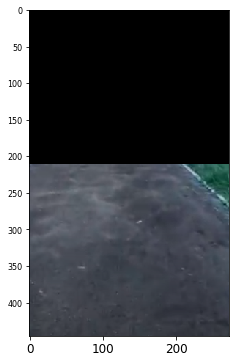

In [14]:
sf = region_of_interest(pista)
showfig(sf)

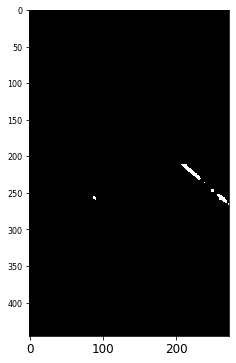

In [6]:
sf = region_of_interest(c)
showfig(sf)

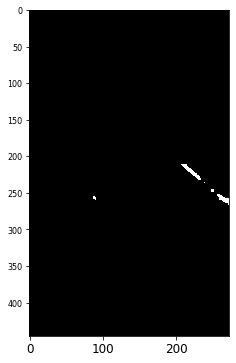

In [7]:

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(sf,cv2.MORPH_CLOSE,kernel, iterations =5)
showfig(opening)
plt.savefig("Imagens\Thresh_semi.pdf")


In [8]:

linhas = cv2.HoughLinesP(opening, 2, np.pi/180, 100, np.array([]), minLineLength=10, maxLineGap=10)
print(linhas)
line_fit=[]

for linha in linhas:
    for x1, y1, x2, y2 in linha:
        fit = np.polyfit((x1,x2), (y1,y2), 1)
        slope = fit[0]
        intercept = fit[1]
        line_fit.append((slope, intercept))

reta_media=np.average(line_fit,axis=0)

slope, intercept = reta_media    
y1 = 350#opening.shape[0]
y2 = int(y1*3/5)
x1= int((y1-intercept)/slope)
x2= int((y2-intercept)/slope)
coord = [x1,x2,y1,y2]

[[[251 246 272 264]]

 [[210 211 272 265]]]


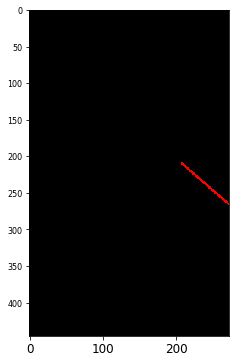

In [9]:
line_image = np.zeros_like(pista)
line_image= cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),2)
showfig(line_image)

plt.savefig("Imagens\Thresh_mask.pdf")


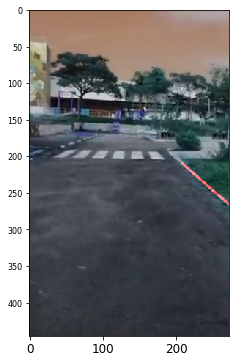

In [10]:
imagem = cv2.addWeighted(pista,0.8,line_image,1,1)
showfig(imagem)
plt.savefig("Imagens\Thresh_final.pdf")


In [11]:
Não rode

import numpy as np
import cv2
import matplotlib.pyplot as plt
def region_of_interest(img):
    height = img.shape[0]
    width = img.shape[1]
    mask = np.ones_like(img)*255

    poly = np.array([[  # Polígono para fazer a máscara (feito sob medida da)
    (0,0),
    (width,0),
    (width,210),
    (0,210),]], np.int32)
    masked=cv2.fillPoly(mask, poly,0) #return none --> preenche a região
    masked_image = cv2.bitwise_and(img, mask) #Ou exclusivo para ignorar oq estiver fora da mask
    return masked_image

#Início

gray = cv2.cvtColor(pista,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(7,7),0 )
#gray = gray[10:210,10:210]
T,c = cv2.threshold(blur,0,255,cv2.THRESH_OTSU) 
sf = region_of_interest(c)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(sf,cv2.MORPH_CLOSE,kernel, iterations =5)



##lINES
linhas = cv2.HoughLinesP(opening, 2, np.pi/180, 100, np.array([]), minLineLength=10, maxLineGap=10)

line_fit=[]
   if linhas is None:
        return None
for linha in linhas:
        for x1, y1, x2, y2 in linha:
            fit = np.polyfit((x1,x2), (y1,y2), 1)
            slope = fit[0]
            intercept = fit[1]
            line_fit.append((slope, intercept))
reta_media=np.average(line_fit,axis=0)

slope, intercept = reta_media    
y1 = 350#opening.shape[0]
y2 = int(y1*3/5)
x1= int((y1-intercept)/slope)
x2= int((y2-intercept)/slope)
coord = [x1,x2,y1,y2]

line_image = np.zeros_like(pista)
if lines is not None:
    line_image= cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),2)

imagem = cv2.addWeighted(pista,0.8,line_image,1,1)



SyntaxError: invalid syntax (<ipython-input-11-a38fad754dcb>, line 1)